# Create Mega Dataframe 2014-2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv("mega-2014.csv", header = 0)
df2 = pd.read_csv("mega-2015.csv", header = 0)
df3 = pd.read_csv("mega-2016.csv", header = 0)
df4 = pd.read_csv("mega-2017.csv", header = 0)

df1['Year'] = 2014
df2['Year'] = 2015
df3['Year'] = 2016
df4['Year'] = 2017

df = pd.concat([df1,df2,df3,df4]).reset_index(drop = True)

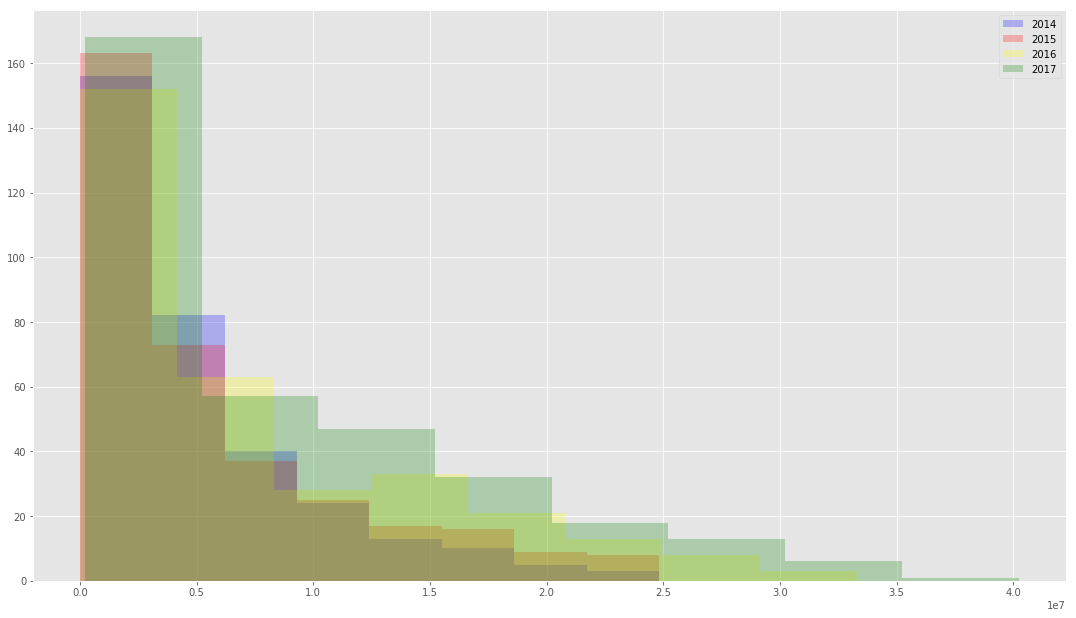

In [3]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.hist(df1['average salary'], 8, alpha=0.25, label='2014', color = 'blue')
plt.hist(df2['average salary'], 8, alpha=0.25, label='2015', color = 'red')
plt.hist(df3['average salary'], 8, alpha=0.25, label='2016', color = 'yellow')
plt.hist(df4['average salary'], 8, alpha=0.25, label='2017', color = 'green')
plt.legend(loc='upper right')
plt.show()

In [9]:
from scipy.stats import gaussian_kde

density1 = gaussian_kde(df1['average salary'])
density1.covariance_factor = lambda : .25
density1._compute_covariance()

density2 = gaussian_kde(df2['average salary'])
density2.covariance_factor = lambda : .25
density2._compute_covariance()

density3 = gaussian_kde(df3['average salary'])
density3.covariance_factor = lambda : .25
density3._compute_covariance()

density4 = gaussian_kde(df4['average salary'])
density4.covariance_factor = lambda : .25
density4._compute_covariance()

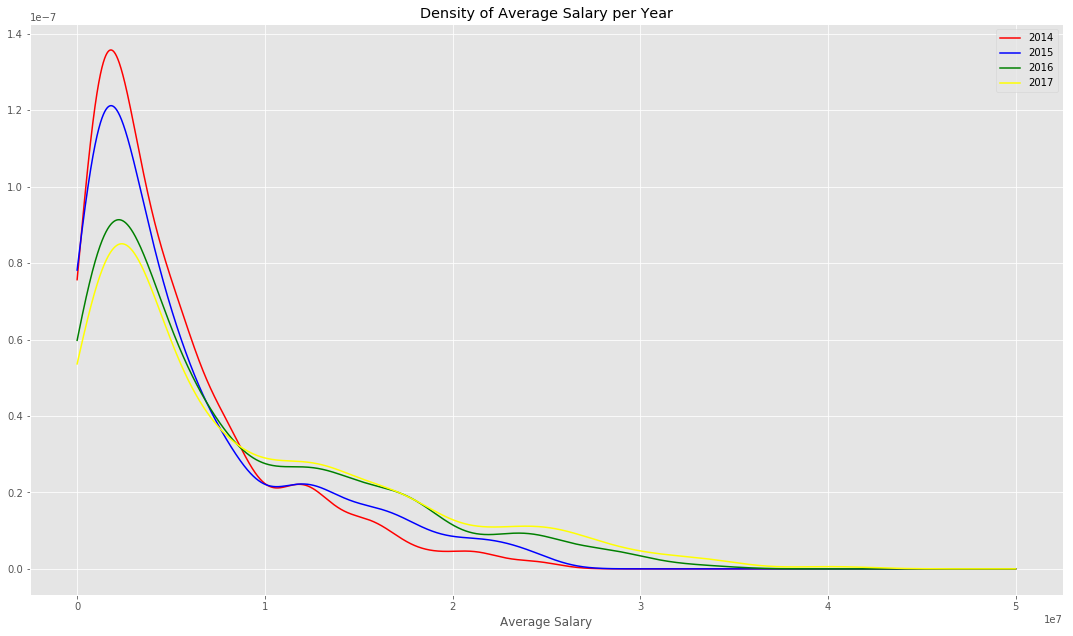

In [16]:
# Plot them
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
xs = np.linspace(0,50000000, 500000)

plt.plot(xs, density1(xs), color = "red", label = "2014")
plt.plot(xs, density2(xs), color = "blue", label = "2015")
plt.plot(xs, density3(xs), color = "green", label = "2016")
plt.plot(xs, density4(xs), color = "yellow", label = "2017")
plt.xlabel("Average Salary")
plt.legend(loc = "upper right")
plt.title("Density of Average Salary per Year")
plt.savefig('avgSalDensity.png', format="png")
plt.show()